In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os

from replay.preprocess.behav import read_dlc, process_dlc, get_reward_info
from replay.preprocess.frequency import read_audio, sliding_stft

dir_name = r"E:\behav\SMT\27049\20220516"
dlc_data = read_dlc(dir_name)
trace = process_dlc(dlc_data)

with open(os.path.join(dir_name, r"temp3.pkl"), "rb") as handle:
    downsampled_time, frequencies, magnitudes = pickle.load(handle)

audio = read_audio(dir_name)

1800.19 54005.700000000004 44100


[1 1 1 ... 1 1 0] 40740


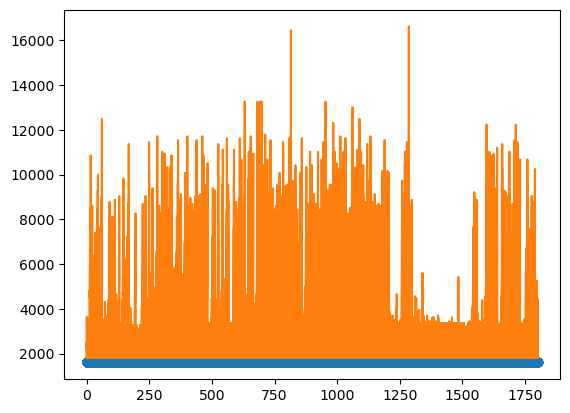

In [10]:
is_press = trace['is_press']
time = audio['video_time']

magnitudes = np.abs(magnitudes)
magnitudes = magnitudes / np.max(magnitudes, axis=0)    
power = magnitudes ** 2
#power = power[frequencies > 1800, :]
#frequencies = frequencies[frequencies > 1800]
dominant_freq = frequencies[np.argmax(power, axis=0)]

print(is_press, np.sum(is_press))
plt.plot(time[np.where(is_press == 1)[0]], np.repeat(1600, np.sum(is_press)), 'o')
plt.plot(time, dominant_freq[:-1])
plt.show()